<a href="https://colab.research.google.com/github/Ashitha-K/Internship/blob/main/Internship_week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#loading the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

 1 Data Loading and Inspection:

In [4]:
#Loading the dataset
data=pd.read_excel("/content/dataset_internship.xlsx")
data.tail()

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Gender,Region,Product Category,Payment Method,Revenue,Store Rating,Loyalty Score,Membership Status,Preferred Visit Time
4995,24,1,39.583865,46.041613,1.000000,0,Male,West,Television,Credit Card,-64.457793,4.187345,9.136240,0.0,Morning
4996,66,5,172.486538,32.751346,1.000000,0,Male,East,Accessories,Debit Card,138.772917,3.868131,1.961965,0.0,Evening
4997,26,11,493.388104,5.000000,2.324783,0,Male,North,Television,Net Banking,1010.219124,4.172183,16.750489,0.0,Evening
4998,53,10,260.269589,23.973041,5.000000,1,Female,West,Accessories,Debit Card,1114.585926,3.942221,25.562475,1.0,Afternoon
4999,36,11,366.613874,13.338613,2.718373,0,Female,South,Accessories,Net Banking,988.644957,3.765622,19.076740,0.0,Morning


In [5]:
#shape of the data
data.shape

(5000, 15)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   5000 non-null   int64  
 1   Items Purchased       5000 non-null   int64  
 2   Total Spent           5000 non-null   float64
 3   Discount (%)          5000 non-null   float64
 4   Satisfaction Score    5000 non-null   float64
 5   Warranty Extension    5000 non-null   int64  
 6   Gender                4998 non-null   object 
 7   Region                5000 non-null   object 
 8   Product Category      5000 non-null   object 
 9   Payment Method        4996 non-null   object 
 10  Revenue               5000 non-null   float64
 11  Store Rating          4997 non-null   float64
 12  Loyalty Score         5000 non-null   float64
 13  Membership Status     4994 non-null   float64
 14  Preferred Visit Time  4992 non-null   object 
dtypes: float64(7), int64(

converting the columns Satisfaction Score  ,Loyalty Score,Membership Status, Loyalty Score  to int

In [7]:
#converting the columns Satisfaction Score  ,Loyalty Score,Membership Status, Loyalty Score  to int
data['Satisfaction Score']=data['Satisfaction Score'].astype(int)
data['Loyalty Score']=data['Loyalty Score'].astype(int)

In [8]:
#checking the data description
data.describe()

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Revenue,Store Rating,Loyalty Score,Membership Status
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4997.000000,5000.000000,4994.000000
mean,43.584600,7.536600,243.721837,26.622330,2.376800,0.220400,717.998214,3.975184,15.141600,0.308370
std,14.919094,4.014858,154.949018,13.586725,1.508269,0.414558,776.789137,0.250691,9.141327,0.461867
min,18.000000,1.000000,15.105730,5.000000,1.000000,0.000000,-201.427094,3.076092,0.000000,0.000000
25%,31.000000,4.000000,119.130074,15.382663,1.000000,0.000000,164.697614,3.799761,7.000000,0.000000
50%,43.000000,7.000000,221.514206,27.848579,2.000000,0.000000,380.548500,3.969738,13.000000,0.000000
75%,56.000000,11.000000,346.173367,38.086993,4.000000,0.000000,1047.426498,4.149998,23.000000,1.000000
max,69.000000,14.000000,699.611576,48.489427,5.000000,1.000000,3523.469177,4.764298,39.000000,1.000000


In [9]:
data.duplicated().sum()

0

In [10]:
#checking null values
data.isnull().sum()


,0
Age,0
Items Purchased,0
Total Spent,0
Discount (%),0
Satisfaction Score,0
Warranty Extension,0
Gender,2
Region,0
Product Category,0
Payment Method,4


In [11]:
#Handling missing values using simple imputer
import pickle
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='most_frequent')
data['Gender']=imputer.fit_transform(data[['Gender']]).ravel()
data['Payment Method']=imputer.fit_transform(data[['Payment Method']]).ravel()
data['Preferred Visit Time']=imputer.fit_transform(data[['Preferred Visit Time']]).ravel()
data['Membership Status']=imputer.fit_transform(data[['Membership Status']]).ravel()
data['Store Rating']=imputer.fit_transform(data[['Store Rating']]).ravel()



In [12]:
#converting store rating and membership status to integer
data['Store Rating']=data['Store Rating'].astype(int)
data['Membership Status']=data['Membership Status'].astype(int)


In [13]:
data.isnull().sum()

,0
Age,0
Items Purchased,0
Total Spent,0
Discount (%),0
Satisfaction Score,0
Warranty Extension,0
Gender,0
Region,0
Product Category,0
Payment Method,0


2 EDA

In [14]:
#Univariate Analysis

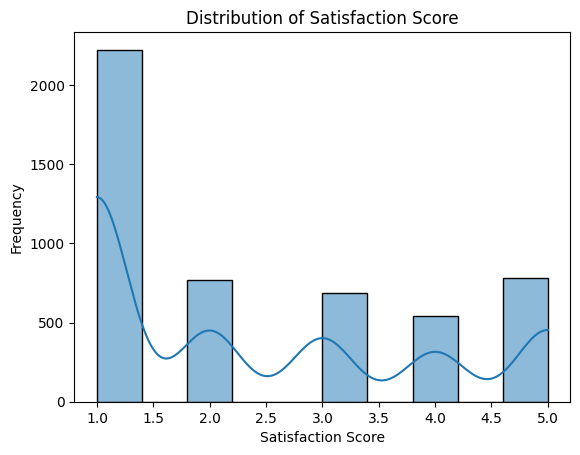

In [15]:
#distribution of satisfaction score
sns.histplot(data['Satisfaction Score'], bins=10,kde=True)
plt.xlabel('Satisfaction Score')
plt.ylabel('Frequency')
plt.title('Distribution of Satisfaction Score')
plt.show()

The highest frequency is around the score of 1.0, indicating a large number of respondents rated their satisfaction very low.
There's a secondary peak near the score of 5.0, suggesting another group of respondents gave a high satisfaction rating.
The middle range (2.0 to 4.0) has relatively low frequencies, indicating fewer respondents with moderate satisfaction levels.

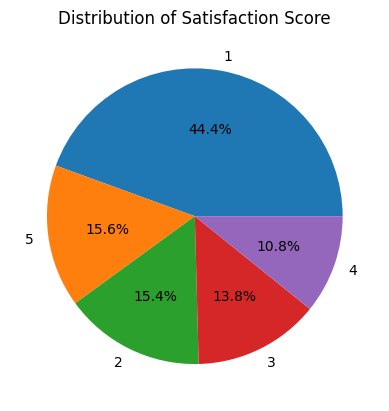

In [16]:
#plotting pie chart for satisfaction score distribution
satisfaction_counts=data['Satisfaction Score'].value_counts()
plt.pie(satisfaction_counts,labels=satisfaction_counts.index,autopct='%1.1f%%')
plt.title('Distribution of Satisfaction Score')
plt.show()

The category with a satisfaction score of 1 represents a significantly larger portion of the distribution (44.4%) compared to the other categories. In contrast, the remaining scores range between 10.8% and 15.6%, which are much smaller. This indicates that the distribution is not uniform or balanced across the scores.

In [17]:
#Grouping columns based on its type
object_columns=['Gender','Payment Method','Preferred Visit Time','Region','Product Category']
descrete_num_col=['Satisfaction Score','Loyalty Score','Items Purchased','Warranty Extension','Store Rating','Membership Status']
continous_columns=['Age','Total Spent','Discount (%)','Revenue']

Plotting the counts of object columns

In [18]:
for i in object_columns:
  print(data[i].value_counts().sort_values(ascending=False))

Gender
Male      2448
Female    2371
Other      181
Name: count, dtype: int64
Payment Method
Net Banking    1042
Cash           1015
Credit Card    1011
Debit Card      980
UPI             952
Name: count, dtype: int64
Preferred Visit Time
Morning      1680
Evening      1660
Afternoon    1660
Name: count, dtype: int64
Region
South    1310
West     1281
East     1208
North    1201
Name: count, dtype: int64
Product Category
Accessories    1015
Laptop         1013
Tablet          997
Television      991
Mobile          984
Name: count, dtype: int64


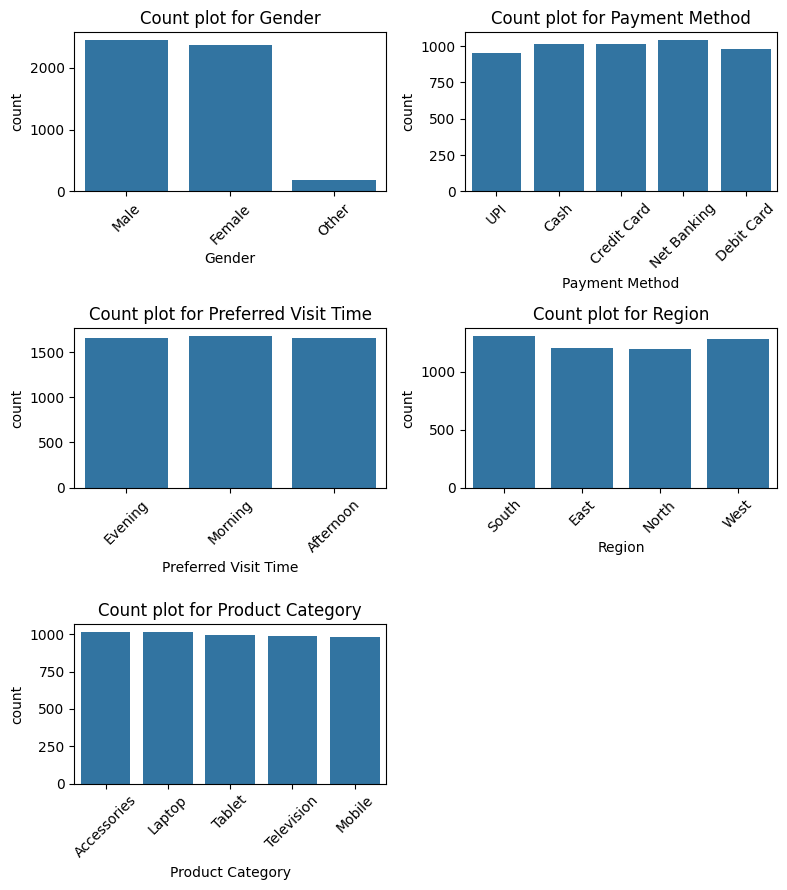

In [19]:

n = len(object_columns)
rows = (n + 1) // 2
fig, axs = plt.subplots(rows, 2, figsize=(8, 3 * rows))
axs = axs.flatten()

for i, col in enumerate(object_columns):
    sns.countplot(data=data, x=col, ax=axs[i])
    axs[i].set_title(f'Count plot for {col}')
    axs[i].set_xticks(axs[i].get_xticks())
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


Insights:
1. Gender Distribution:
The majority of the customer base is male (2,448), slightly outnumbering females (2,371).
A small portion of the customers (181) identify as other, indicating diversity but also a potential opportunity to cater more inclusively to this segment.
2. Payment Method Preferences:
Net Banking is the most popular payment method (1,042), followed closely by Cash (1,015) and Credit Card (1,011).
Debit Card (980) and UPI (952) are slightly less preferred but still significant, suggesting a fairly balanced usage of digital and non-digital payment modes.
3. Preferred Visit Time:
Customers are almost equally distributed across the morning (1,680), evening (1,660), and afternoon (1,660) time slots, showing no strong preference for a specific time of day.
This indicates a steady flow of customers throughout the day, requiring consistent staffing and resource allocation.
4. Regional Distribution:
The South region has the highest number of customers (1,310), followed closely by the West (1,281).
The East (1,208) and North (1,201) regions have slightly fewer customers, but the distribution across regions is relatively even, suggesting a wide geographic reach.
5. Product Categories:
Accessories (1,015) and Laptops (1,013) are the most popular product categories.
Other categories like Tablets (997), Televisions (991), and Mobiles (984) also have significant demand, indicating diverse product interest.
This reflects a well-rounded market appeal, though accessories and laptops might require more inventory focus.

Plot for Descrete columns

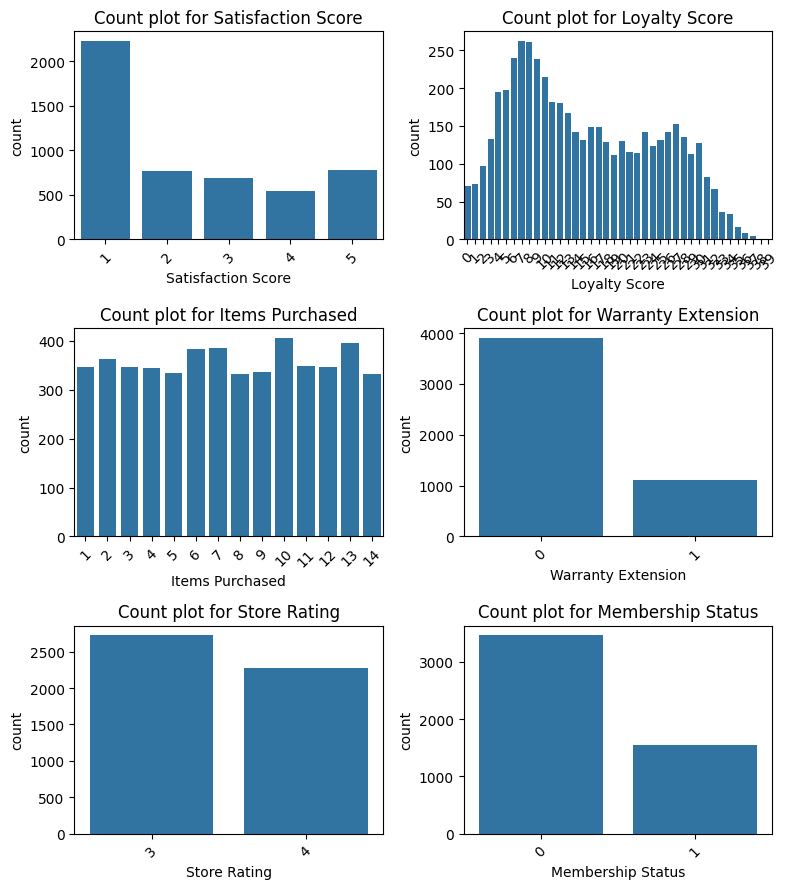

In [20]:
n = len(descrete_num_col)
rows = (n + 1) // 2
fig, axs = plt.subplots(rows, 2, figsize=(8, 3 * rows))
axs = axs.flatten()

for i, col in enumerate(descrete_num_col):
    sns.countplot(data=data, x=col, ax=axs[i])
    axs[i].set_title(f'Count plot for {col}')
    axs[i].set_xticks(axs[i].get_xticks())
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

Insights:
1. Satisfaction Score:
A majority of the customers rated their satisfaction as 1, which suggests a high level of dissatisfaction.
There are significantly fewer ratings in the higher satisfaction categories (2, 3, 4, and 5).
Insight: This indicates a need for improvement in customer experience or product/service quality.
2. Loyalty Score:
Loyalty scores follow a bell-curve-like distribution, with most scores concentrated in the 20-50 range.
There are fewer customers with very low or very high loyalty scores.
Insight: Efforts to engage moderately loyal customers can help improve overall retention.
3. Items Purchased:
The count of items purchased is relatively uniform across the range, suggesting consistent buying behavior among customers for different quantities.
No specific item count shows dominance, indicating a balanced demand.
Insight: This consistency might reflect effective product availability and customer interest.
4. Warranty Extension:
A large majority of customers have not opted for a warranty extension.
Only a small proportion of customers are investing in additional warranty coverage.
Insight: Educating customers on the benefits of warranty extension or offering promotional deals could increase uptake.
5. Store Rating:
Store ratings are distributed between 3 and 4, with 3 being the most frequent.
Insight: While the ratings are not extremely poor, they show room for improvement in store operations or customer service.
6. Membership Status:
A majority of customers do not have memberships.
A smaller segment of customers is part of a membership program.
Insight: Increasing awareness of membership benefits or offering additional perks might encourage more customers to join.

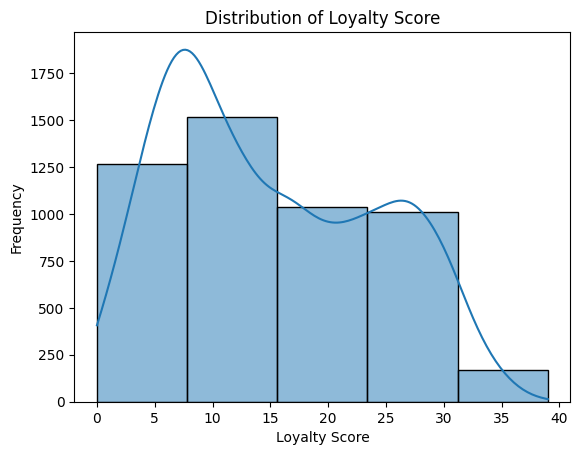

In [21]:
#Distribution of Loyalty score
sns.histplot(data['Loyalty Score'], bins=5,kde=True)
plt.xlabel('Loyalty Score')
plt.ylabel('Frequency')
plt.title('Distribution of Loyalty Score')
plt.show()


The distribution shows a peak around a score of 10, suggesting that many respondents have relatively low to moderate loyalty.

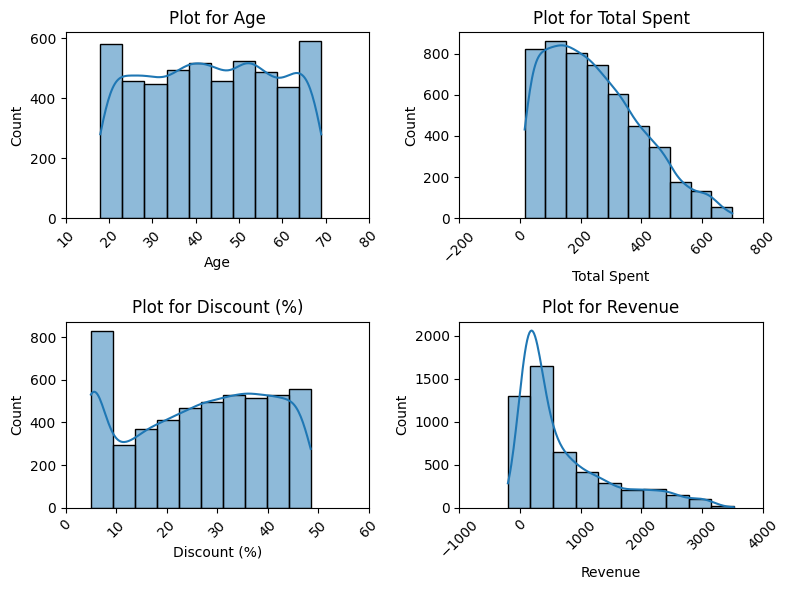

In [22]:
n = len(continous_columns)
rows = (n + 1) // 2
fig, axs = plt.subplots(rows, 2, figsize=(8, 3 * rows))
axs = axs.flatten()

for i, col in enumerate(continous_columns):
    sns.histplot(data=data, x=col, bins=10,kde=True,ax=axs[i])
    axs[i].set_title(f'Plot for {col}')
    axs[i].set_xticks(axs[i].get_xticks())
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

Calculating the negative values in revenue

In [23]:
negative_revenue = data[data['Revenue'] < 0]
print(negative_revenue)
print(f"Percentage of negative values: {len(negative_revenue) / len(data) * 100:.2f}%")

      Age  Items Purchased  Total Spent  Discount (%)  Satisfaction Score  \
9      40                1    22.031897     47.796810                   1   
15     41                3    60.740472     43.925953                   1   
30     66                1    31.084704     46.891530                   1   
40     20                1    45.533810     45.446619                   1   
71     59                3    69.537497     43.046250                   1   
...   ...              ...          ...           ...                 ...   
4971   19                2    84.260225     41.573977                   1   
4976   43                3    47.709753     45.229025                   1   
4980   39                3    77.659379     42.234062                   1   
4984   39                1    17.034683     48.296532                   1   
4995   24                1    39.583865     46.041613                   1   

      Warranty Extension  Gender Region Product Category Payment Method  \


1. Age Distribution:
The age distribution is relatively uniform, with slight peaks around the 20-30 and 60-70 age ranges.
Customers of all age groups are well-represented, indicating a broad customer demographic.
Insight: Marketing strategies can be tailored for different age groups. For example, focus on tech-savvy products for younger customers and products with ease of use for older customers.
2. Total Spent:
The distribution is right-skewed, meaning most customers spend lower amounts (around 0–200), with fewer spending in higher ranges (above 500).
Insight: Most customers are in the low-spending category. Implement strategies like bundles, discounts, or rewards to encourage higher spending.
3. Discount (%):
The highest count is for lower discounts (0–10%), with the count gradually increasing as discounts rise up to 50%.
Insight: Customers are responding well to higher discounts. Increasing promotional activities with higher discounts could drive more sales.
4. Revenue:
Revenue distribution is right-skewed, with the majority of customers contributing lower revenues (under 1,000 units).
A small portion of customers generates significantly higher revenue (above 2,000 units).
Insight: High-revenue customers could be targeted for loyalty programs or premium offerings to retain them. Efforts can also focus on converting low-revenue customers into higher contributors.

Bivariate Analysis

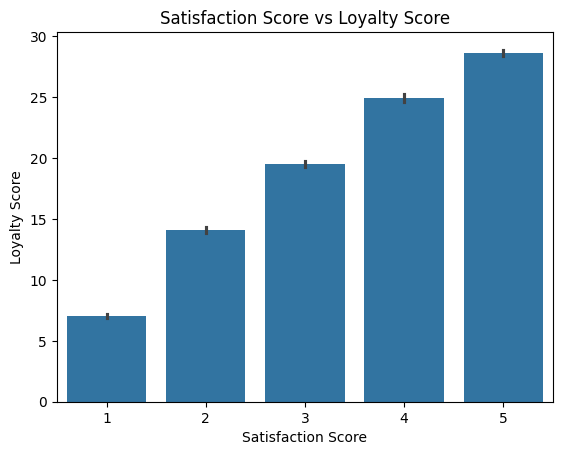

In [24]:
#satisfaction score vs Loyalty score
sns.barplot(data=data,x='Satisfaction Score',y='Loyalty Score')
plt.xlabel('Satisfaction Score')
plt.ylabel('Loyalty Score')
plt.title('Satisfaction Score vs Loyalty Score')
plt.show()

There is a clear positive correlation between satisfaction and loyalty scores. As satisfaction scores increase, loyalty scores also tend to increase. This suggests that customers who are more satisfied are generally more loyal.

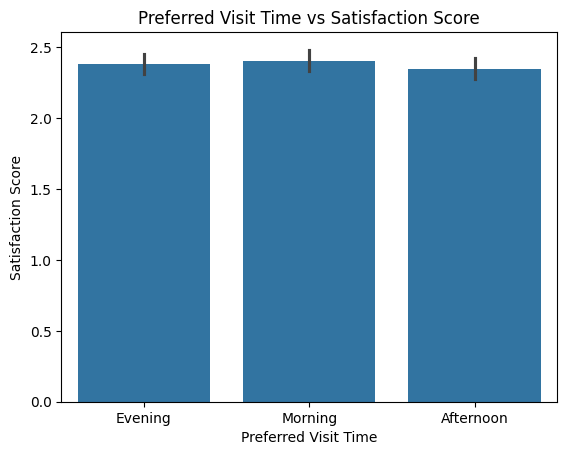

In [25]:
#Prefered visit time vs Satisfaction score scatterplot
sns.barplot(data=data,x='Preferred Visit Time',y='Satisfaction Score')
plt.xlabel('Preferred Visit Time')
plt.ylabel('Satisfaction Score')
plt.title('Preferred Visit Time vs Satisfaction Score')
plt.show()


Higher Loyalty in Evenings and Afternoons: The highest loyalty scores are observed for customers who prefer to visit in the evening and afternoon.

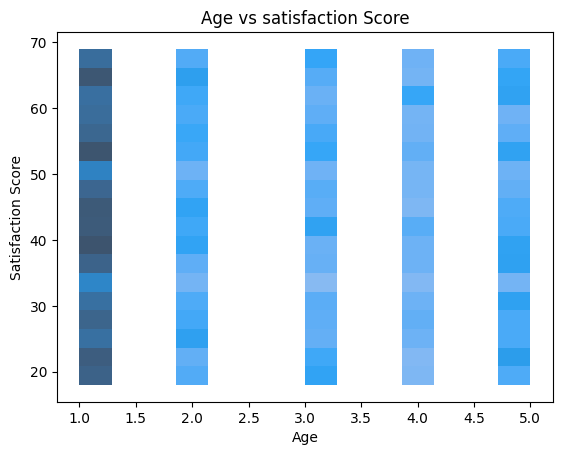

In [26]:
#age vs Loyalty score
sns.histplot(data=data,x='Satisfaction Score',y='Age')
plt.xlabel('Age')
plt.ylabel('Satisfaction Score')
plt.title('Age vs satisfaction Score')
plt.show()



Since there isn’t a noticeable pattern suggests that age may not have a strong influence on Satisfaction score in this dataset.

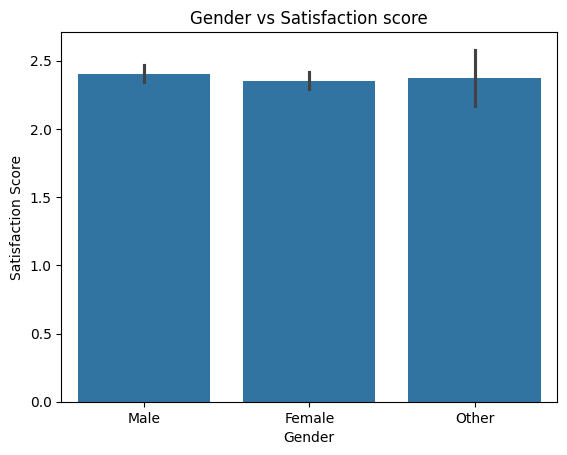

In [27]:
#Gender vs Satisfaction score
sns.barplot(data=data,x='Gender',y='Satisfaction Score')
plt.xlabel('Gender')
plt.ylabel('Satisfaction Score')
plt.title('Gender vs Satisfaction score')
plt.show()

The similarity in scores across genders suggests loyalty is fairly consistent regardless of gender.

In [28]:
data['Items Purchased'].value_counts()

,count
Items Purchased,
10,405
13,396
7,386
6,383
2,363
11,348
3,347
1,346
12,346


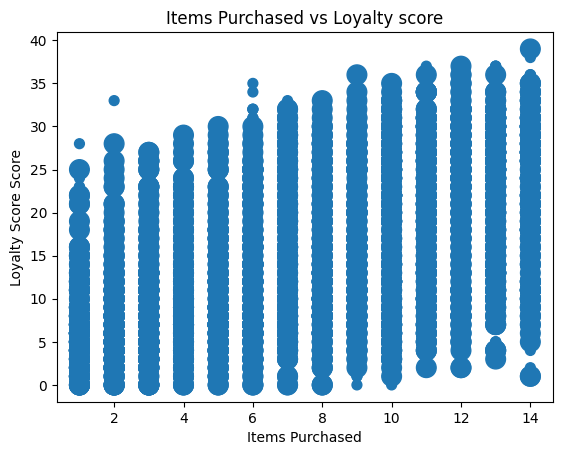

In [29]:
#item purchased vs Loyalty score
plt.scatter(data['Items Purchased'],data['Loyalty Score'],sizes=(50, 200))
plt.xlabel('Items Purchased')
plt.ylabel('Loyalty Score Score')
plt.title('Items Purchased vs Loyalty score')
plt.show()

There appears to be a positive relationship between the number of items purchased and the loyalty score. Customers buying more items may have a higher loyalty or satisfaction level.

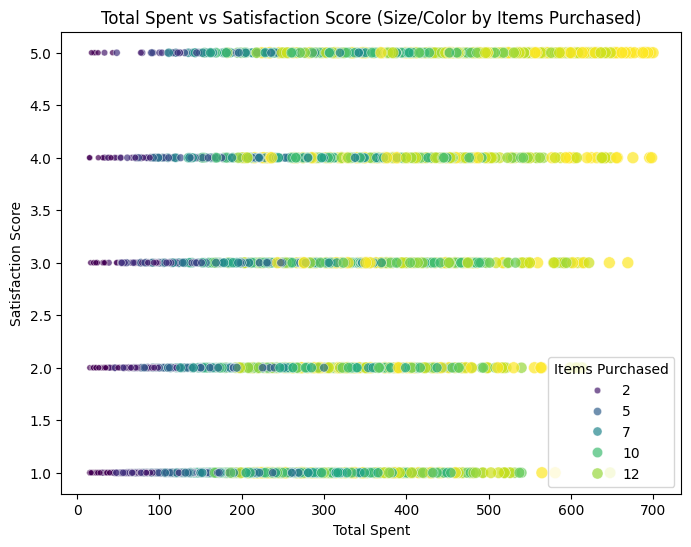

In [30]:
# Scatter plot with size based on Items Purchased
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Total Spent', y='Satisfaction Score', size='Items Purchased', data=data, hue='Items Purchased', palette='viridis', alpha=0.7)
plt.title('Total Spent vs Satisfaction Score (Size/Color by Items Purchased)')
plt.show()


This plot suggests that both Total Spent and Items Purchased may be significant factors affecting Satisfaction Score.

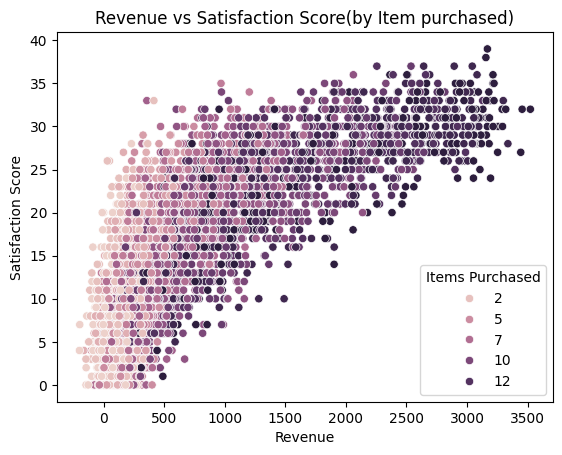

In [31]:
#Revenue vs Satisfaction score
sns.scatterplot(data=data,x='Revenue',y='Loyalty Score',hue='Items Purchased')
plt.xlabel('Revenue')
plt.ylabel('Satisfaction Score')
plt.title('Revenue vs Satisfaction Score(by Item purchased)')
plt.show()



A positive correlation between revenue and loyalty score, with higher revenues generally associated with higher loyalty scores and more items purchased.

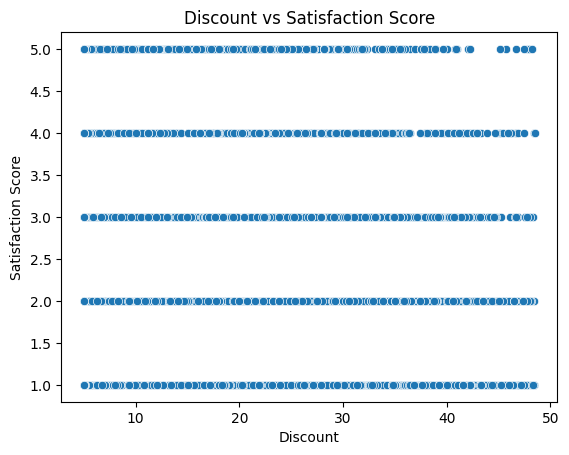

In [32]:
#Discount vs Satisfaction score
sns.scatterplot(data=data,x='Discount (%)',y='Satisfaction Score')
plt.xlabel('Discount')
plt.ylabel('Satisfaction Score')
plt.title('Discount vs Satisfaction Score')
plt.show()

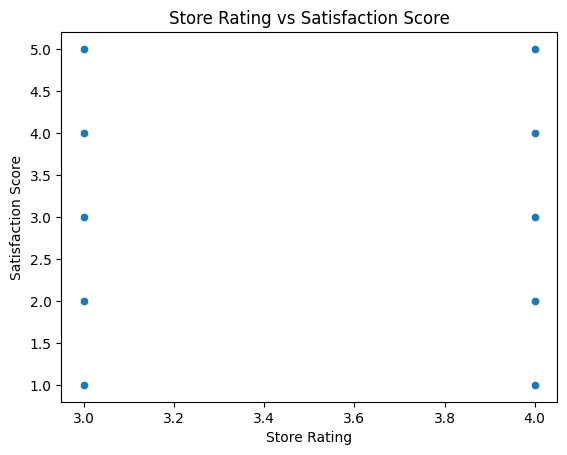

In [33]:
#Store rating vs Satisfaction score
sns.scatterplot(data=data,x='Store Rating',y='Satisfaction Score')
plt.xlabel('Store Rating')
plt.ylabel('Satisfaction Score')
plt.title('Store Rating vs Satisfaction Score')
plt.show()

In [34]:
# Pivot table for Region and Product Category
region_category_counts = data.pivot_table(index='Region', columns='Product Category', aggfunc='size', fill_value=0)
print(region_category_counts)

Product Category  Accessories  Laptop  Mobile  Tablet  Television
Region                                                           
East                      254     221     233     269         231
North                     230     256     234     217         264
South                     269     258     292     237         254
West                      262     278     225     274         242


South: Consistently strong sales across categories, with the highest total when all categories are combined.
West: Shows high demand for Laptops and Tablets, with above-average sales in both categories compared to other regions.
East and North: These regions have a more balanced distribution of sales across categories, with no single category showing extreme highs.

In [35]:
# Average Satisfaction and Loyalty Score by Region and Product Category
region_category_stats = data.groupby(['Region', 'Product Category']).agg({'Satisfaction Score': 'mean', 'Loyalty Score': 'mean'}).reset_index()
print(region_category_stats)


   Region Product Category  Satisfaction Score  Loyalty Score
0    East      Accessories            2.456693      16.074803
1    East           Laptop            2.447964      15.321267
2    East           Mobile            2.321888      14.854077
3    East           Tablet            2.379182      15.163569
4    East       Television            2.333333      14.666667
5   North      Accessories            2.413043      15.534783
6   North           Laptop            2.339844      14.968750
7   North           Mobile            2.427350      15.367521
8   North           Tablet            2.479263      15.880184
9   North       Television            2.420455      15.412879
10  South      Accessories            2.397770      14.907063
11  South           Laptop            2.174419      14.085271
12  South           Mobile            2.325342      14.732877
13  South           Tablet            2.379747      14.983122
14  South       Television            2.519685      16.165354
15   Wes

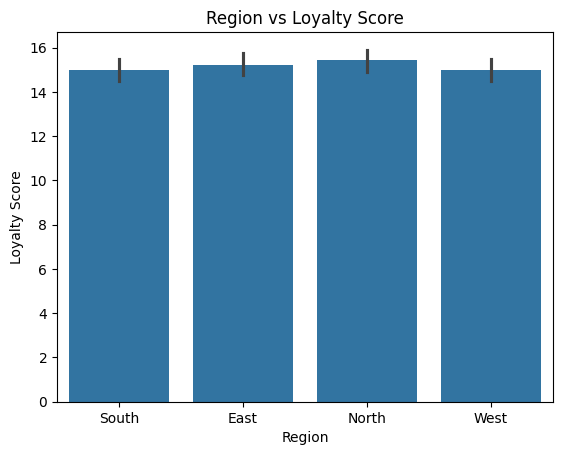

In [36]:
#Region vs loyalty score
sns.barplot(data=data,x='Region',y='Loyalty Score')
plt.xlabel('Region')
plt.ylabel('Loyalty Score')
plt.title('Region vs Loyalty Score')
plt.show()

The similarity in scores across regions suggests loyalty is fairly consistent regardless of region.

Findings


*   Satisfaction score vs Loyalty score:There is a clear positive correlation between satisfaction and loyalty scores. As satisfaction scores increase, loyalty scores also tend to increase. This suggests that customers who are more satisfied are generally more loyal.
*   Prefered vistit time vs Loyalty score:Higher Loyalty in Evenings and Afternoons: The highest loyalty scores are observed for customers who prefer to visit in the evening and afternoon.


*   Age vs Loyalty score:Since there isn’t a noticeable pattern suggests that age may not have a strong influence on loyalty score in this dataset.
*   Gende vs Loyalty score:The similarity in scores across genders suggests loyalty is fairly consistent regardless of gender.


*   Item purchased vs Loyalty score:There appears to be a positive relationship between the number of items purchased and the loyalty score. Customers buying more items may have a higher loyalty or satisfaction level.
*   Total spent vs Loyalty score:This plot suggests that both Total Spent and Items Purchased may be significant factors affecting Loyalty Score.


*   Revenue  vs Loyalty score:A positive correlation between revenue and loyalty score, with higher revenues generally associated with higher loyalty scores and more items purchased.


*   Region vs Loyalty score:The similarity in scores across regions suggests loyalty is fairly consistent regardless of region.
*   List item


*   Region and Product Category:
South: Consistently strong sales across categories, with the highest total when all categories are combined. West: Shows high demand for Laptops and Tablets, with above-average sales in both categories compared to other regions. East and North: These regions have a more balanced distribution of sales across categories, with no single category showing extreme highs.


*   Television seems to have relatively high loyalty scores across regions, especially in the South (16.67) and West (16.05).
Laptop shows lower satisfaction scores in all regions, with the South region having the lowest at 2.46.
Tablet scores well in terms of satisfaction and loyalty, especially in the North.











3. Data Cleaning


In [37]:
#Checking outliers
# Calculate IQR for numerical columns
continous_columns=['Age','Total Spent','Discount (%)','Revenue']
Q1 = data[continous_columns].quantile(0.25)
Q3 = data[continous_columns].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((data[continous_columns] < lower_bound) | (data[continous_columns] > upper_bound)).sum()
print(outliers)

Age               0
Total Spent      13
Discount (%)      0
Revenue         301
dtype: int64


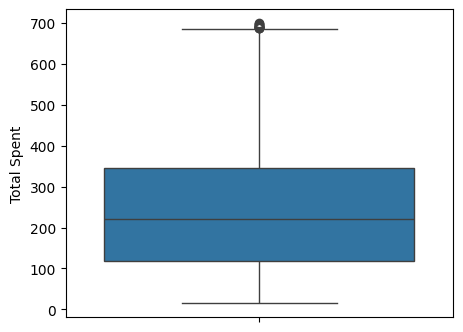

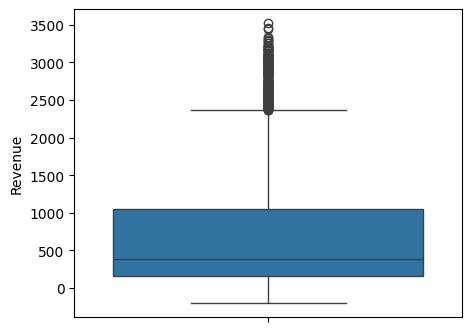

In [38]:
#Checking for outliers
outlier_columns=['Total Spent','Revenue']
for i in outlier_columns:
  plt.figure(figsize=(5, 4))
  sns.boxplot(data[i])
  plt.show()

In [39]:
#Clipping  the outliers
for i in continous_columns:
  data[i]=np.where(data[i]>upper_bound[i],upper_bound[i],data[i])
  data[i]=np.where(data[i]<lower_bound[i],lower_bound[i],data[i])

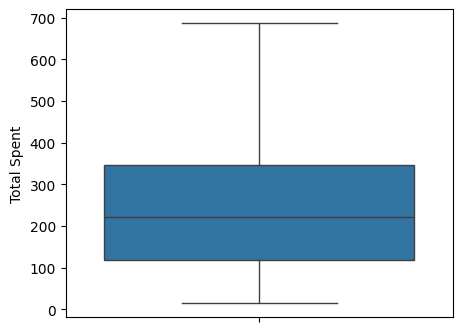

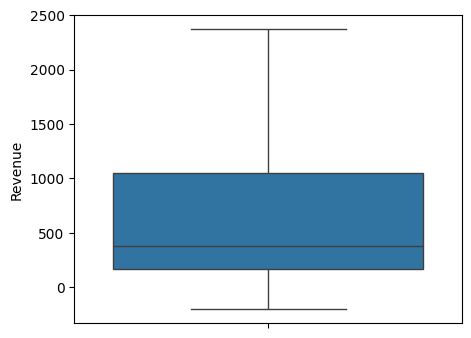

In [40]:
#Plotting the outlier after clipping
for i in outlier_columns:
  plt.figure(figsize=(5, 4))
  sns.boxplot(data[i])
  plt.show()

<Axes: >

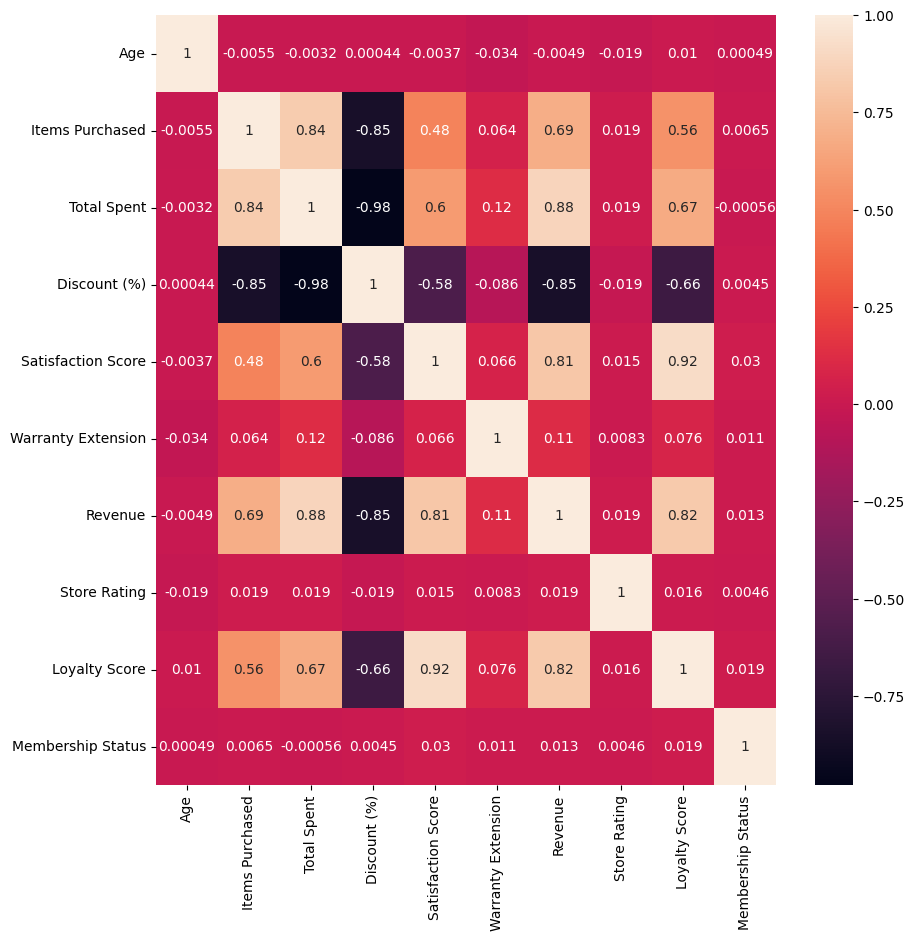

In [41]:
#Correlation separating the numerical columns
data_corr=data.select_dtypes(include=['int64','float64'])
data_corr.corr()
ax=plt.subplots(figsize=(10,10))
sns.heatmap(data_corr.corr(),annot=True)



Revenue and Total spent were highly correlated so we can drop Revenue column

In [42]:
#Droping the Revenue column
data.drop('Revenue',axis=1,inplace=True)

Encoding the categorical features

In [43]:
categorical_columns=['Gender','Payment Method','Preferred Visit Time','Region','Product Category']

In [44]:
for i in data.columns:
  if data[i].dtype=='object':
    print(data[i].unique())

['Male' 'Female' 'Other']
['South' 'East' 'North' 'West']
['Accessories' 'Laptop' 'Tablet' 'Television' 'Mobile']
['UPI' 'Cash' 'Credit Card' 'Net Banking' 'Debit Card']
['Evening' 'Morning' 'Afternoon']


In [45]:
from sklearn.preprocessing import OneHotEncoder #one hot encoding
encoder=OneHotEncoder(drop='first')
encoded_data=pd.DataFrame(encoder.fit_transform(data[categorical_columns]).toarray(),columns=encoder.get_feature_names_out())
# Concatenate the one-hot encoded columns with the original DataFrame
data_encoded = pd.concat([data.drop(categorical_columns, axis=1),encoded_data], axis=1)

In [46]:
#pickling the encode
import pickle
pickle.dump(encoder,open('encoder.pkl','wb'))

Feature engineering

In [47]:
'''#Feature Engineering
#Creating new feature spend per item
data_encoded['Spend per Item']=data_encoded['Total Spent']/data_encoded['Items Purchased']
drop_columns=['Items Purchased','Total Spent']
data_encoded.drop(drop_columns,axis=1,inplace=True)'''


"#Feature Engineering\n#Creating new feature spend per item\ndata_encoded['Spend per Item']=data_encoded['Total Spent']/data_encoded['Items Purchased']\ndrop_columns=['Items Purchased','Total Spent']\ndata_encoded.drop(drop_columns,axis=1,inplace=True)"

In [48]:
#data_encoded.head()

In [49]:
data_encoded.shape

(5000, 24)

Feature engineering

In [50]:
data_encoded.head()

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Store Rating,Loyalty Score,Membership Status,Gender_Male,...,Payment Method_UPI,Preferred Visit Time_Evening,Preferred Visit Time_Morning,Region_North,Region_South,Region_West,Product Category_Laptop,Product Category_Mobile,Product Category_Tablet,Product Category_Television
0,56.0,1,29.226195,47.077380,1,1,3,3,1,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,69.0,10,420.142612,7.985739,3,1,3,25,1,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,46.0,4,127.742817,37.225718,1,1,3,7,1,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,32.0,9,417.722683,8.227732,1,0,3,7,1,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,60.0,13,608.031366,5.000000,3,0,3,29,0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


Note: Created features like Spend per item(items purchased/total spent) and spending efficiency(Revenue/Total spent)

In [51]:
#Splitting into x and y
x=data_encoded.drop('Satisfaction Score',axis=1)
y=data_encoded['Satisfaction Score']

Feature Selection

In [52]:
# Embedded Method: Feature Importance using Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x, y)
importances = rf_model.feature_importances_

# Sort features by importance
important_features = sorted(zip(importances, x.columns), reverse=True)
print("Feature Rankings:", important_features)
#selecting the top 5 features
important_features = [feature for importance, feature in important_features[:4]]
print("Selected Features:", important_features)

Feature Rankings: [(0.38645860526410625, 'Loyalty Score'), (0.12460925275860597, 'Total Spent'), (0.10928084014438502, 'Discount (%)'), (0.07757794997982882, 'Age'), (0.06741239567581647, 'Items Purchased'), (0.017401860239835282, 'Gender_Male'), (0.01633913043577813, 'Membership Status'), (0.01586823887106254, 'Store Rating'), (0.015255781274941892, 'Preferred Visit Time_Evening'), (0.015205859347872433, 'Preferred Visit Time_Morning'), (0.013686109996279703, 'Region_West'), (0.01304534011424297, 'Region_North'), (0.012960056407030263, 'Product Category_Laptop'), (0.012818664088348449, 'Region_South'), (0.012798760489370875, 'Product Category_Tablet'), (0.012474096999835413, 'Payment Method_Debit Card'), (0.012318704036550115, 'Payment Method_Credit Card'), (0.012182431341820607, 'Product Category_Mobile'), (0.012135999968941807, 'Payment Method_Net Banking'), (0.012017507831765863, 'Payment Method_UPI'), (0.011961899984423654, 'Product Category_Television'), (0.0117266450803517, 'War

In [53]:
x_new=x[important_features]
x_new.head(10)


,Loyalty Score,Total Spent,Discount (%),Age
0,3,29.226195,47.077380,56.0
1,25,420.142612,7.985739,69.0
2,7,127.742817,37.225718,46.0
3,7,417.722683,8.227732,32.0
4,29,608.031366,5.000000,60.0
5,16,252.834236,24.716576,25.0
6,31,477.772666,5.000000,38.0
7,13,263.362317,23.663768,56.0
8,27,256.175250,24.382475,36.0
9,4,22.031897,47.796810,40.0


In [54]:
#Scaling
#Minmax scaling
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler=MinMaxScaler()
x_scaled=pd.DataFrame(scaler.fit_transform(x_new),columns=x_new.columns)
x_scaled.head()

,Loyalty Score,Total Spent,Discount (%),Age
0,0.076923,0.021024,0.967531,0.745098
1,0.641026,0.603063,0.068654,1.000000
2,0.179487,0.167706,0.741001,0.549020
3,0.179487,0.599460,0.074219,0.274510
4,0.743590,0.882813,0.000000,0.823529


In [67]:
pickle.dump(scaler,open('scaler.pkl','wb'))

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import GridSearchCV
import pickle
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=DeprecationWarning)

Splitting the data to test and train

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

model using Logistic Regression with gridsearchcv

In [58]:
lr=LogisticRegression()
parameters={
    'C':[0.001,0.01,0.1,1,10,100,1000]
}
cv_lr=GridSearchCV(lr,parameters,cv=5)
cv_lr.fit(x_train,y_train)
print(cv_lr.best_params_)

{'C': 10}


In [59]:
cv_lr.best_estimator_

LogisticRegression(C=10)

In [60]:
#checking using best parameter
lr=LogisticRegression(C=100)
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)

In [61]:
print(y_pred_lr)

[1 3 3 2 1 3 1 2 5 1 1 2 1 1 2 1 2 5 1 1 1 1 2 2 3 1 5 1 1 1 3 1 3 1 5 1 1
 5 1 1 3 1 5 1 1 2 5 5 1 1 1 3 2 1 2 2 5 5 4 5 5 1 2 1 3 1 5 1 1 2 1 1 1 2
 5 4 2 4 1 1 4 1 3 1 1 1 3 4 5 2 5 1 3 2 2 1 3 3 5 1 2 5 5 1 5 1 5 3 1 1 1
 3 1 2 3 1 4 5 1 2 1 3 4 1 1 2 1 1 2 1 5 1 1 4 2 4 5 2 2 1 1 3 1 1 2 1 2 1
 1 3 2 1 3 3 1 5 1 3 5 1 3 3 5 1 2 2 2 5 1 1 2 4 1 1 5 5 1 5 1 1 1 1 5 1 1
 3 3 4 3 1 5 1 2 3 3 1 3 1 5 1 3 1 3 3 2 2 3 4 1 4 5 1 3 2 1 1 1 1 1 5 2 3
 5 1 1 1 1 3 1 3 3 1 5 5 5 1 3 1 3 5 3 1 4 1 3 5 1 4 4 2 1 1 4 1 1 4 1 5 1
 1 1 3 1 5 1 2 1 5 2 1 1 4 3 3 1 5 1 1 5 1 3 1 3 1 1 1 1 1 1 1 3 1 2 1 5 1
 4 5 3 1 1 5 1 3 2 4 1 1 1 5 5 3 4 1 5 1 3 1 5 2 1 1 1 2 5 3 4 2 1 1 5 5 5
 1 5 1 1 3 1 1 3 3 1 5 1 2 1 2 1 1 3 1 1 1 5 1 4 5 3 1 3 1 1 1 1 4 3 2 3 1
 3 1 1 3 1 3 3 1 5 5 5 3 4 1 1 1 2 1 2 1 3 1 3 2 3 5 1 1 1 1 1 1 1 5 5 5 2
 1 1 2 3 1 5 1 1 1 4 1 5 3 1 2 1 1 1 1 1 4 1 1 5 1 1 3 1 3 3 1 1 5 2 4 1 5
 2 5 2 2 1 1 5 1 5 3 3 1 1 4 1 1 4 1 5 1 1 3 3 4 1 3 2 1 1 1 1 1 1 3 1 4 4
 1 1 1 5 2 1 1 1 1 2 1 5 

In [62]:
#Checking evaluation metrics accuracy precision recall
#def results(results):
  #print('BEST PARAMS: {}\n'.format(results.best_params_))
accuracy=accuracy_score(y_test,y_pred_lr)
precision=precision_score(y_test,y_pred_lr,average='weighted')
recall=recall_score(y_test,y_pred_lr,average='weighted')
f1=f1_score(y_test,y_pred_lr,average='weighted')
print('Accuracy:',accuracy)
print('Precision:',precision)
print('Recall:',recall)
print('F1 Score:',f1)



Accuracy: 0.702
Precision: 0.6878876810692642
Recall: 0.702
F1 Score: 0.6914911216404117


SVC Classifier

In [63]:
svc=SVC()
parameters={
    'kernel':['linear','rbf'],
    'C':[0.1,1,10]
}
cv_svc=GridSearchCV(svc,parameters,cv=5)
cv_svc.fit(x_train,y_train)
print(cv_svc)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']})


In [68]:
#best parameters
print(cv_svc.best_params_)
print(cv_svc.best_estimator_)

{'C': 10, 'kernel': 'linear'}
SVC(C=10, kernel='linear')


In [69]:
#checking with best parameters
svc=SVC(C=10,kernel='linear')
svc.fit(x_train,y_train)
y_pred_svc=svc.predict(x_test)
print(y_pred_svc)

[1 3 3 2 1 3 1 2 5 1 1 2 1 1 2 1 2 5 1 1 1 1 2 2 3 1 5 1 1 1 4 1 3 1 5 1 1
 5 1 1 3 1 5 1 1 2 5 5 1 1 1 3 2 1 2 2 5 5 4 5 5 1 2 1 3 1 5 1 1 2 1 1 1 2
 5 4 2 4 1 1 4 1 3 1 1 1 3 4 5 2 5 1 3 2 2 1 3 3 5 1 2 5 5 1 5 1 5 3 1 1 1
 3 1 2 3 1 4 5 1 2 1 3 4 1 1 2 1 1 2 1 5 1 1 4 2 4 5 2 2 1 1 3 1 1 2 1 2 1
 1 3 2 1 3 3 1 5 1 3 5 1 3 3 5 1 2 2 2 5 1 1 2 4 1 1 5 5 1 5 1 1 1 1 5 1 1
 3 3 4 3 1 5 1 2 3 3 1 3 1 5 1 4 1 3 4 2 2 3 4 1 4 5 1 3 2 1 1 1 1 1 5 2 4
 5 1 1 1 1 3 1 3 3 1 5 5 5 1 4 1 3 5 3 1 4 1 3 5 1 4 4 2 1 1 4 1 1 4 1 5 1
 1 1 3 1 5 1 2 1 5 2 1 1 4 3 3 1 5 1 1 5 1 3 1 3 1 1 1 1 1 1 1 3 1 2 1 5 1
 4 5 4 1 1 5 1 3 2 4 1 1 1 5 5 3 4 1 5 1 3 1 5 2 1 1 1 2 5 3 4 2 1 1 5 5 5
 1 5 1 1 3 1 1 3 3 1 5 1 2 1 2 1 1 3 1 1 1 5 1 4 5 4 1 3 1 1 1 1 4 3 2 3 1
 3 1 1 3 1 3 3 1 5 5 5 3 4 1 1 1 2 1 2 1 3 1 3 2 3 5 1 1 1 1 1 1 1 5 5 5 2
 1 1 2 3 1 5 1 1 1 4 1 5 3 1 2 1 1 1 1 1 4 1 1 5 1 1 3 1 3 3 1 1 5 2 4 1 5
 2 5 2 2 1 1 5 1 5 3 4 1 1 4 1 1 4 1 5 1 1 3 3 4 1 4 2 1 1 1 1 1 1 3 1 4 4
 1 1 1 5 2 1 1 1 1 2 1 5 

RandomForest Classifier

In [65]:
rf=RandomForestClassifier()
parameters={'n_estimators':[5,50,250],
            'max_depth':[2,4,8,16,32,None]}

cv_rf=GridSearchCV(rf,parameters,cv=5)
cv_rf.fit(x_train,y_train)
#print_results(cv_rf)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [5, 50, 250]})

In [72]:
#Best parameters
print(cv_rf.best_params_)
print(cv_rf.best_estimator_)

{'max_depth': 4, 'n_estimators': 250}
RandomForestClassifier(max_depth=4, n_estimators=250)


In [73]:
#checking with best parameters
rf=RandomForestClassifier(max_depth=32,n_estimators=250)
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
print(y_pred_rf)

[2 2 2 3 1 3 1 1 3 1 1 3 1 1 2 1 1 5 1 1 1 1 2 2 2 1 5 1 1 1 4 2 3 1 5 1 1
 5 1 1 4 1 5 1 1 2 5 4 1 1 1 3 2 1 2 2 5 5 3 5 5 1 1 1 3 1 5 1 1 2 1 1 1 2
 4 4 2 3 1 1 5 1 3 1 1 1 3 3 5 1 4 1 3 2 2 1 3 3 5 1 2 4 5 1 5 1 5 3 1 1 1
 2 1 2 3 1 4 4 1 2 1 3 4 1 1 2 1 1 2 1 5 1 1 4 2 4 5 2 2 1 1 3 1 1 2 1 2 1
 1 3 2 2 3 2 1 5 1 4 5 1 3 2 5 1 2 2 3 5 1 1 2 3 1 1 5 5 1 5 1 1 1 1 4 1 1
 3 3 4 3 1 5 1 2 2 3 1 4 1 5 1 3 1 3 4 2 3 3 3 1 4 5 1 3 2 1 1 1 1 1 4 1 5
 5 1 1 1 1 2 1 3 3 2 5 5 5 1 5 1 2 5 3 1 4 1 3 5 1 4 5 2 1 1 4 1 1 4 2 5 1
 1 1 3 1 5 1 1 1 4 2 1 2 5 5 3 1 5 1 1 5 1 3 1 2 1 1 2 1 1 1 1 4 1 2 1 5 1
 4 5 5 1 1 5 1 2 2 4 1 1 1 5 4 5 4 1 5 1 3 1 5 2 1 1 1 2 5 4 4 3 1 1 5 5 5
 1 5 1 1 3 1 1 3 4 1 5 1 3 1 2 1 1 4 1 1 1 5 1 5 5 5 1 3 1 1 1 1 3 2 2 4 1
 3 1 1 3 1 3 3 1 5 5 5 3 4 1 1 1 1 1 2 1 3 1 2 3 3 5 1 1 1 1 2 1 1 5 5 5 2
 1 1 1 4 1 5 1 1 1 3 2 5 3 2 1 1 2 1 2 1 4 1 1 5 1 1 4 1 3 3 1 1 5 3 4 1 5
 2 4 2 2 1 1 5 2 5 3 5 1 1 2 1 1 3 1 5 1 1 4 4 4 1 4 2 1 1 2 1 1 1 3 1 5 5
 1 1 1 5 2 1 1 1 1 2 1 5 

In [74]:
#calculating the metrics
accuracy=accuracy_score(y_test,y_pred_rf)
precision=precision_score(y_test,y_pred_rf,average='weighted')
recall=recall_score(y_test,y_pred_rf,average='weighted')
f1=f1_score(y_test,y_pred_rf,average='weighted')
print('Accuracy:',accuracy)
print('Precision:',precision)
print('Recall:',recall)
print('F1 Score:',f1)

Accuracy: 0.649
Precision: 0.641396618887151
Recall: 0.649
F1 Score: 0.6446344059156293


In [75]:
#pickle
pickle.dump(rf,open('rf.pkl','wb'))


In [77]:
#checking with best parameters for randomforest
rf=RandomForestClassifier(max_depth=32,n_estimators=250)
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)


In [78]:
#printing accuracy
print(accuracy_score(y_test,y_pred_rf))


0.658


comparing y_test and y_pred

In [79]:
# Direct Comparison
comparison = pd.DataFrame({'True Labels': y_test, 'Predicted Labels': y_pred_rf})
print(comparison.tail(10))


      True Labels  Predicted Labels
944             3                 3
1268            2                 1
4231            5                 5
2307            5                 5
4424            1                 1
4711            1                 1
2313            1                 1
3214            1                 1
2732            1                 1
1926            1                 1


In [80]:
#pickling
pickle.dump(rf,open('rf_new.pkl','wb'))


LogisticRegression model provides best accuracy, precison,recall compared to other models. so LogisticRegression used for model building using flask

